In [4]:
import cryo_em_select as cryo
from pathlib import Path
import os

model = cryo.CryoEmNet(batch_size=4, image_size=(640,880,1), label_type='gauss')
model.train(
    filepath=Path(str(os.getcwd())) / 'test_model' / 'checkpoint',
    learning_rate=10 ** -2, 
    epochs=1,
    save_log=False,
    save_model=False)

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 640, 880, 1  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_124 (Conv2D)            (None, 640, 880, 8)  80          ['input_4[0][0]']                
                                                                                                  
 batch_normalization_86 (BatchN  (None, 640, 880, 8)  32         ['conv2d_124[0][0]']             
 ormalization)                                                                                    
                                                                                            

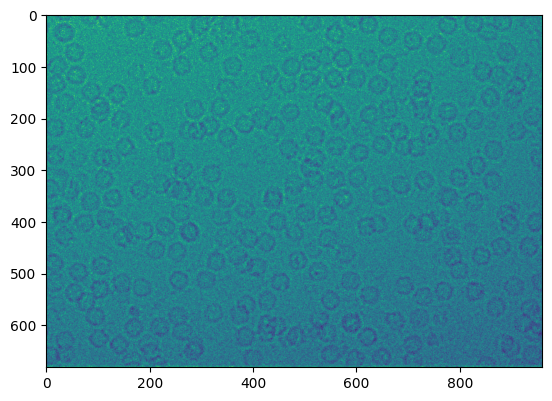

In [11]:
from pathlib import Path
from matplotlib import pyplot as plt
import matplotlib.image as mpimg

path = Path(str(os.getcwd())) / 'data' / 'raw_data' / 'FoilHole_16384305_Data_16383479_16383481_20201016_164256_fractions.png'
img = mpimg.imread(path)
imgplot = plt.imshow(img)

(1, 640, 880)
1/1 [==============================] - 1s 547ms/step
(1, 640, 880, 1)


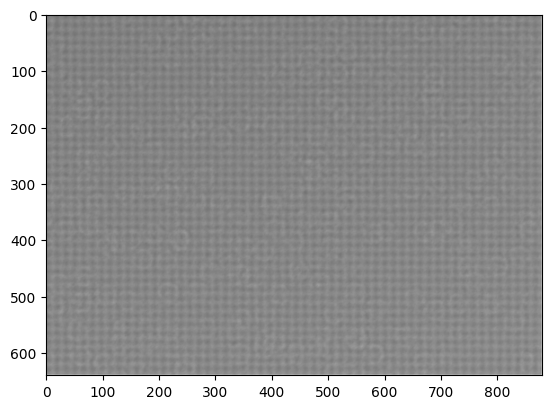

In [26]:
import numpy as np

img = mpimg.imread(path)
img = img[21:-21, 40:-40]
img = np.expand_dims(img, axis=0)

print(img.shape)
res = model.predict(img)
print(res.shape)
plt.imshow(res[0], cmap='gray')